In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [6]:
## data and ref imports
ds = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_all_20170101_20200101.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = mesh.tmask[0]

In [25]:
## global definitions
rho = 1026
rho_inv = 1/rho

# volume = mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0] * (tmask[0])
volume = tmask * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]

In [2]:
def dye_to_volume(jdepth, volume, rho_inv, data):
    data_np = data[0:jdepth].values
    river_arr = rho_inv * np.multiply(volume[0:jdepth], data_np)
    return river_arr

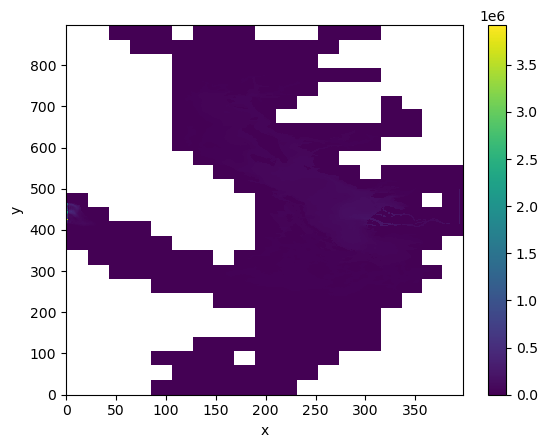

In [39]:
dye_to_volume(40, volume, rho_inv, ds.fraser_river[200])[0].plot()